# Regenerar Information Value

En esta notebook vamos a regenerar el listado con information value...

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import pandas as pd
import re
import numpy as np

df = pd.read_csv("../output/provinces_words.csv", index_col=0)

cant_palabras = [c for c in df.columns if re.match(r'.*ocurrencias$', c)]
cant_personas = [c for c in df.columns if re.match(r'.*usuarios$', c)]

print("columnas de palabras => {}\n".format(cant_palabras))
print("columnas de usuarios => {}".format(cant_personas))

df["cant_provincias"] = (df[cant_palabras] > 0).sum(axis=1)
df["cant_palabra"] = df[cant_palabras].sum(axis=1)
df["cant_usuarios"] = df[cant_personas].sum(axis=1)

columnas de palabras => ['buenosaires_ocurrencias', 'catamarca_ocurrencias', 'chaco_ocurrencias', 'chubut_ocurrencias', 'cordoba_ocurrencias', 'corrientes_ocurrencias', 'entrerios_ocurrencias', 'formosa_ocurrencias', 'jujuy_ocurrencias', 'lapampa_ocurrencias', 'larioja_ocurrencias', 'mendoza_ocurrencias', 'misiones_ocurrencias', 'neuquen_ocurrencias', 'rionegro_ocurrencias', 'salta_ocurrencias', 'sanjuan_ocurrencias', 'sanluis_ocurrencias', 'santacruz_ocurrencias', 'santafe_ocurrencias', 'santiago_ocurrencias', 'tierradelfuego_ocurrencias', 'tucuman_ocurrencias']

columnas de usuarios => ['buenosaires_usuarios', 'catamarca_usuarios', 'chaco_usuarios', 'chubut_usuarios', 'cordoba_usuarios', 'corrientes_usuarios', 'entrerios_usuarios', 'formosa_usuarios', 'jujuy_usuarios', 'lapampa_usuarios', 'larioja_usuarios', 'mendoza_usuarios', 'misiones_usuarios', 'neuquen_usuarios', 'rionegro_usuarios', 'salta_usuarios', 'sanjuan_usuarios', 'sanluis_usuarios', 'santacruz_usuarios', 'santafe_usuario

In [2]:
from contrastes.information_value import simulated_shuffled_entropy_multinomial
from scipy.stats import entropy

np.random.seed(seed=1)

fn = lambda ws: simulated_shuffled_entropy_multinomial(int(ws), len(cant_palabras))

df["sh_entropy_palabras"] = df.cant_palabra.apply(fn)
df["sh_entropy_personas"] = df.cant_usuarios.apply(fn)

df["entropy_palabras"] = df[cant_palabras].apply(entropy, axis=1, raw=True)
df["entropy_personas"] = df[cant_personas].apply(entropy, axis=1, raw=True)

df["delta_palabras"] = df["sh_entropy_palabras"] - df["entropy_palabras"]
df["delta_personas"] = df["sh_entropy_personas"] - df["entropy_personas"]

df["log_cantidad"] = np.log2(df.cant_palabra)
df["log_personas"] = np.log2(df.cant_usuarios)

df["norm_cantidad"] = df["log_cantidad"] / df["log_cantidad"].max() 
df["norm_personas"] = df["log_personas"] / df["log_personas"].max()

df["ival_palabras"] = df.norm_cantidad * df.delta_palabras
df["ival_personas"] = df.norm_personas * df.delta_personas
df["ival"] = df["ival_palabras"] * df["ival_personas"]

df_personas = df.sort_values("ival_personas", ascending=False)
df_palabras = df.sort_values("ival_palabras", ascending=False)
df_pp = df.sort_values("ival", ascending=False)

In [3]:
df.sort_values("ival_personas", inplace=True, ascending=False)

df["rank"] = range(df.shape[0])

df.iloc[:10][["cant_palabra", "cant_usuarios"]]

,cant_palabra,cant_usuarios
palabra,,
ush,5050,1210
chivil,1976,518
poec,1229,560
malpegue,1922,666
aijue,2211,715
tolhuin,2957,787
vallerga,1933,437
yarca,997,507
blv,5464,697


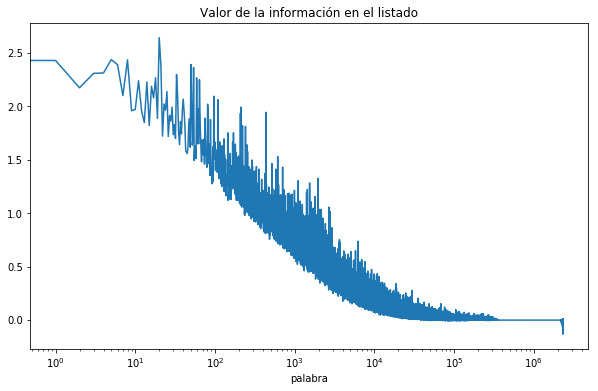

In [4]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (10, 6)
df.ival.plot();
plt.title(u"Valor de la información en el listado")
plt.semilogx();

In [5]:
information_columns = [
    "delta_palabras", "delta_personas",
    "norm_cantidad", "norm_personas",
    "ival_personas", "ival_palabras", "ival",
]

df.iloc[:100][information_columns]

,delta_palabras,delta_personas,norm_cantidad,norm_personas,ival_personas,ival_palabras,ival
palabra,,,,,,,
ush,2.916887,2.715280,0.499041,0.649612,1.763877,1.455646,2.567580
chivil,3.106774,3.080058,0.444127,0.571970,1.761700,1.379803,2.430799
poec,2.998651,3.008539,0.416336,0.579105,1.742259,1.248446,2.175115
malpegue,3.001721,2.922999,0.442506,0.594969,1.739094,1.328278,2.310001
aijue,2.955155,2.888444,0.450704,0.601466,1.737301,1.331899,2.313909
tolhuin,3.003843,2.844822,0.467718,0.610246,1.736042,1.404952,2.439056
vallerga,3.128017,3.101950,0.442840,0.556408,1.725951,1.385210,2.390804
yarca,3.037041,3.004913,0.404092,0.570005,1.712817,1.227245,2.102045
blv,2.906689,2.777390,0.503652,0.599133,1.664025,1.463960,2.436066


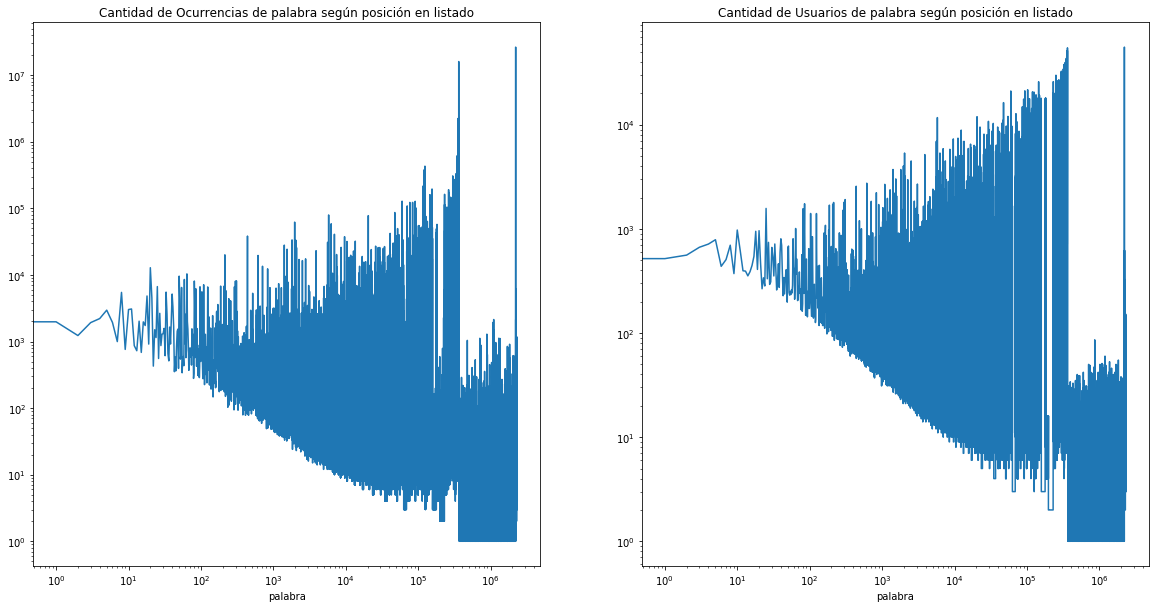

In [6]:
plt.rcParams['figure.figsize'] = (20, 10)
plt.subplot(1, 2, 1)
df.cant_palabra.plot()


plt.semilogx();
plt.semilogy();
plt.title(u"Cantidad de Ocurrencias de palabra según posición en listado");

plt.subplot(1, 2, 2)
df.cant_usuarios.plot()

plt.semilogx();
plt.semilogy();
plt.title(u"Cantidad de Usuarios de palabra según posición en listado");

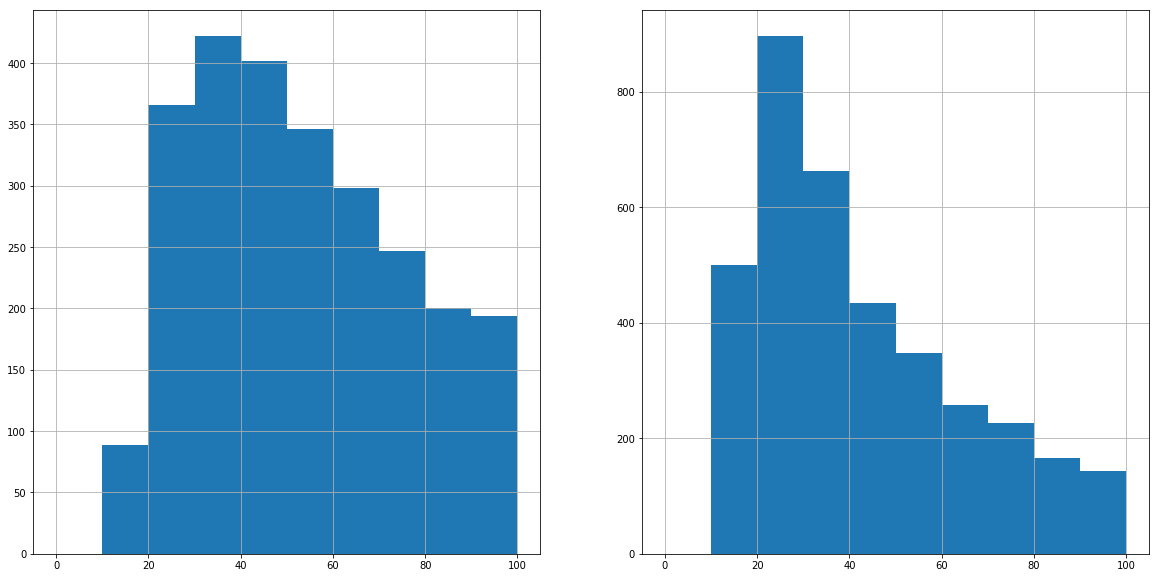

In [7]:
plt.subplot(1,2,1)
df.cant_palabra.iloc[:5000].hist(range=(0, 100))
plt.subplot(1,2,2)
df.cant_usuarios.iloc[:5000].hist(range=(0, 100))


## ¿Y qué onda estas nuevas palabras? ¿Son muchas nuevas?

In [17]:
cincomil_nuevas = df.iloc[:5000].copy()

analizadas = pd.read_csv("../data/listado_definitivo.csv")
analizadas.set_index(' ', inplace=True)
analizadas["candidata"] = analizadas["Palabra Candidata"]
palabras_ya_analizadas = analizadas[analizadas['candidata'].notna()].index

Text(0.5,1,'Cantidad de palabras no revisadas en función del filtro aplicado por cantidad de ocurrencias')

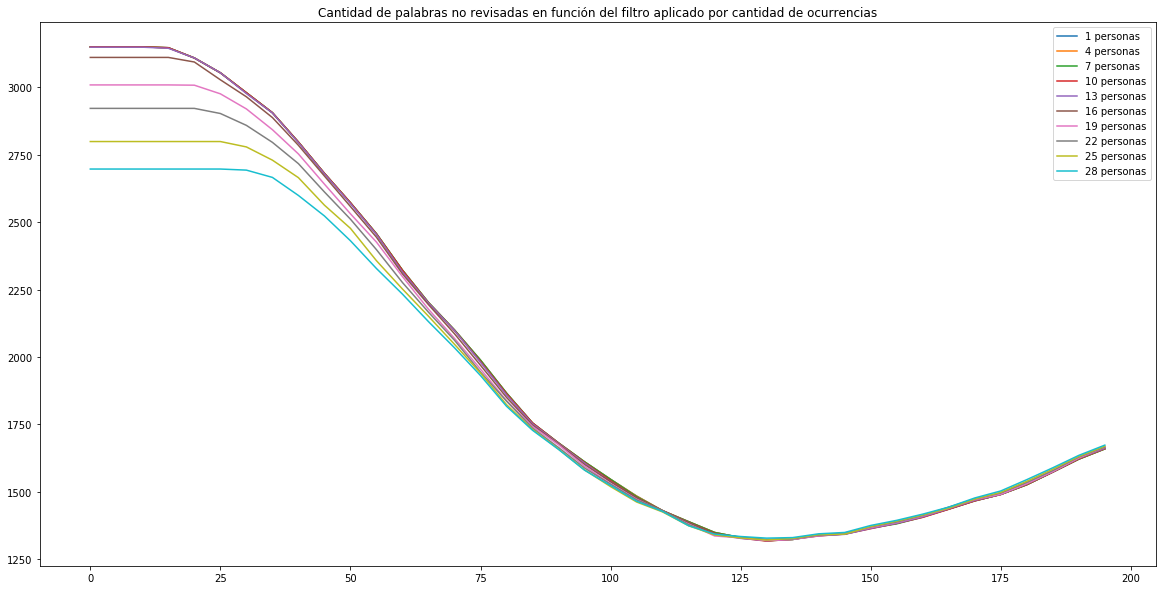

In [18]:

handles = []

for minimo_personas in range(1, 30, 3):
    filtros = range(0, 200, 5)

    diferencias = []
    
    for filtro in filtros:
        nuevas = df[(df.cant_palabra > filtro) & (df.cant_usuarios >= minimo_personas)].iloc[:5000]
        diferencia = nuevas.index.difference(palabras_ya_analizadas)
        diferencias.append(len(diferencia))
    handle, = plt.plot(filtros, diferencias, label="{} personas".format(minimo_personas))
    
    handles.append(handle)
    
plt.legend(handles=handles)
plt.title(u"Cantidad de palabras no revisadas en función del filtro aplicado por cantidad de ocurrencias")


Acá estamos utilizando **TODO** el dataset (no sólo el training), con lo cual es esperable que los datos sean distintos. Ahora, tenemos una diferencia importante (por ej, filtrando con 40 palabras faltan etiquetar otras 3000). Habría que ver qué tradeoff hacemos.

# Y si hacemos N=3000?

Text(0.5,1,'Cantidad de palabras no revisadas en función del filtro aplicado por cantidad de ocurrencias')

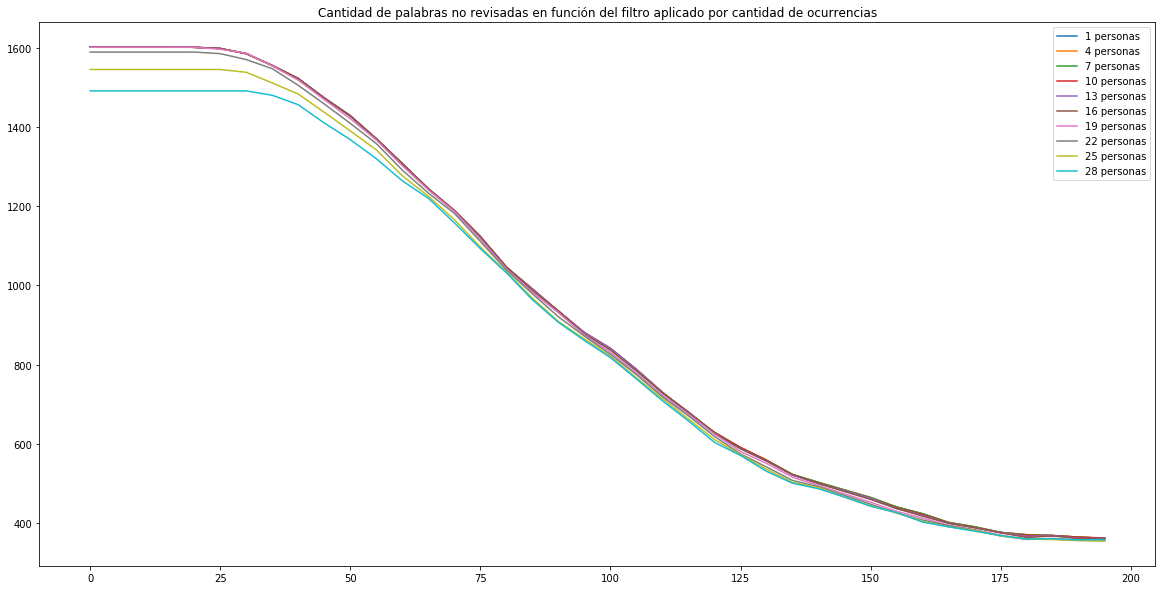

In [19]:

handles = []

for minimo_personas in range(1, 30, 3):
    filtros = range(0, 200, 5)

    diferencias = []
    
    for filtro in filtros:
        nuevas = df[(df.cant_palabra > filtro) & (df.cant_usuarios >= minimo_personas)].iloc[:3000]
        diferencia = nuevas.index.difference(palabras_ya_analizadas)
        diferencias.append(len(diferencia))
    handle, = plt.plot(filtros, diferencias, label="{} personas".format(minimo_personas))
    
    handles.append(handle)
    
plt.legend(handles=handles)
plt.title(u"Cantidad de palabras no revisadas en función del filtro aplicado por cantidad de ocurrencias")

# N = 4000

Text(0.5,1,'Cantidad de palabras no revisadas en función del filtro aplicado por cantidad de ocurrencias')

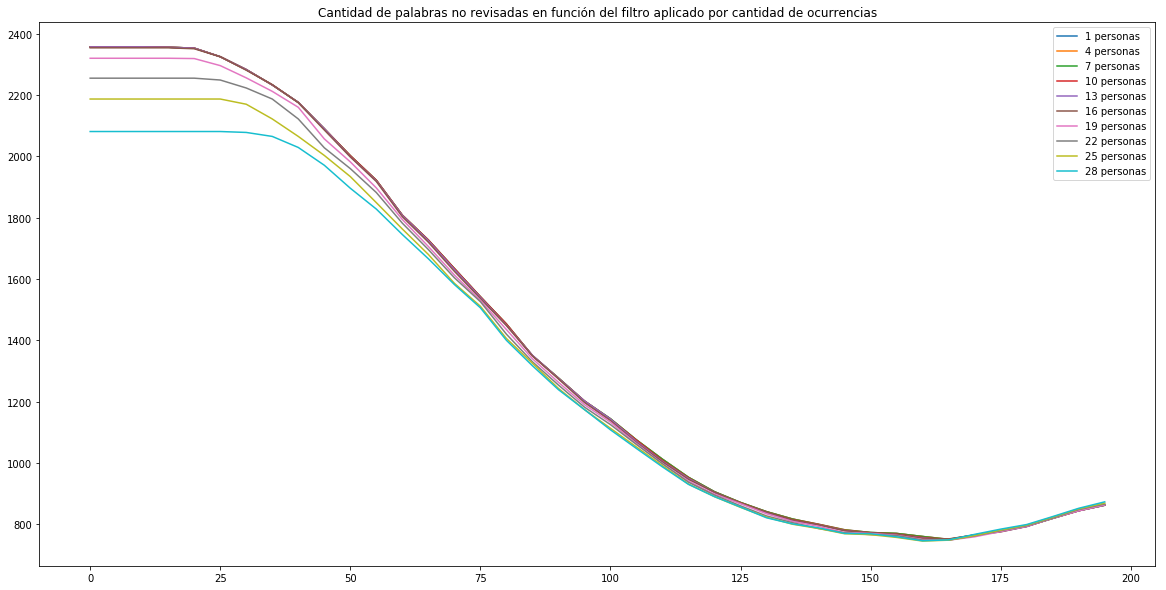

In [20]:

handles = []

for minimo_personas in range(1, 30, 3):
    filtros = range(0, 200, 5)

    diferencias = []
    
    for filtro in filtros:
        nuevas = df[(df.cant_palabra > filtro) & (df.cant_usuarios >= minimo_personas)].iloc[:4000]
        diferencia = nuevas.index.difference(palabras_ya_analizadas)
        diferencias.append(len(diferencia))
    handle, = plt.plot(filtros, diferencias, label="{} personas".format(minimo_personas))
    
    handles.append(handle)
    
plt.legend(handles=handles)
plt.title(u"Cantidad de palabras no revisadas en función del filtro aplicado por cantidad de ocurrencias")